In [1]:
#!pip install geopandas 
#!git clone https://github.com/Princenihith/Maps_with_python
!pip install altair
!pip install geopandas
!pip install simpledbf

In [2]:
import io
import requests
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Downloading the cleaned csv file from our GitHub account
url = "https://raw.githubusercontent.com/YashashGaurav/EDA-Indian-Startup-Analysis/main/dataset/ISF_Consolidated_Final.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head(5)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Unknown,12,2021
2,Simpl,2015.0,Bengaluru,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,12,2021
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000.0,Unknown,12,2021
4,PayGlocal,2021.0,Bengaluru,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,12,2021


In [5]:
df.columns.tolist()

['company_name',
 'founded_year',
 'company_hq_location',
 'sector',
 'company_description',
 'founders',
 'investor',
 'amount_usd',
 'funding_round',
 'funding_month',
 'funding_year']

In [6]:
df.isna().sum()

company_name            0
founded_year            2
company_hq_location    10
sector                  4
company_description     0
founders               25
investor               90
amount_usd              0
funding_round           0
funding_month           0
funding_year            0
dtype: int64

In [7]:
df.describe()

,founded_year,funding_month,funding_year
count,1618.000000,1620.000000,1620.00000
mean,2016.284302,5.732716,2021.26358
std,6.893268,3.402327,0.44071
min,1871.000000,1.000000,2021.00000
25%,2015.000000,3.000000,2021.00000
50%,2018.000000,5.000000,2021.00000
75%,2020.000000,9.000000,2022.00000
max,2022.000000,12.000000,2022.00000


In [8]:
print("we have percentages of null data \n",(df.isna().sum())/len(df))

we have percentages of null data 
 company_name           0.000000
founded_year           0.001235
company_hq_location    0.006173
sector                 0.002469
company_description    0.000000
founders               0.015432
investor               0.055556
amount_usd             0.000000
funding_round          0.000000
funding_month          0.000000
funding_year           0.000000
dtype: float64


In [9]:
#so we can afely drop the null values
df.dropna(inplace=True)

In [10]:
df.isna().sum()

company_name           0
founded_year           0
company_hq_location    0
sector                 0
company_description    0
founders               0
investor               0
amount_usd             0
funding_round          0
funding_month          0
funding_year           0
dtype: int64

### so now lets take questions we can ask our data to get annswers to them


#  Q1. If I’m starting a business in a certain field, which place in India should I move to where similar successful startups already exist?

In [11]:
# for city to state data.
cities = pd.read_json('https://raw.githubusercontent.com/YashashGaurav/EDA-Indian-Startup-Analysis/main/dataset/cities.json')
cities.set_index('id', inplace=True)
cities.head(3)

,name,state
id,,
1,Mumbai,Maharashtra
2,Delhi,Delhi
3,Bengaluru,Karnataka


In [12]:
# merge these data (which has mapping of city and state) so we get states nd plot them
dfstate = df.merge(cities, how='left', left_on='company_hq_location', right_on='name').drop(['name'], axis=1)
dfstate = dfstate.rename(columns={'state': 'company_hq_state'})
dfstate['company_hq_state'].value_counts()

Karnataka                 539
Maharashtra               304
Haryana                   202
Delhi                     174
Tamil Nadu                 67
Uttar Pradesh              51
Telangana                  49
Gujarat                    29
Rajasthan                  17
Kerala                      9
West Bengal                 7
Chandigarh                  6
Madhya Pradesh              3
Goa                         3
Andhra Pradesh              2
Bihar                       2
Jharkhand                   2
Assam                       2
Uttarakhand                 1
Dadra and Nagar Haveli      1
Odisha                      1
Maharastra                  1
Name: company_hq_state, dtype: int64

In [13]:
dfstate.head(3)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year,company_hq_state
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021,Haryana
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Unknown,12,2021,Maharashtra
2,Simpl,2015.0,Bengaluru,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,12,2021,Karnataka


In [14]:
dfstate.isna().sum()

company_name            0
founded_year            0
company_hq_location     0
sector                  0
company_description     0
founders                0
investor                0
amount_usd              0
funding_round           0
funding_month           0
funding_year            0
company_hq_state       28
dtype: int64

In [15]:
# Analysing the effect of dropping states with no names
print(f'By dropping we lose: {dfstate["company_hq_state"].isna().sum() / len(dfstate):.04f}% data')

By dropping we lose: 0.0187% data


In [16]:
dfstate = dfstate.dropna(subset=["company_hq_state"])

In [17]:
dfstate.isna().sum()

company_name           0
founded_year           0
company_hq_location    0
sector                 0
company_description    0
founders               0
investor               0
amount_usd             0
funding_round          0
funding_month          0
funding_year           0
company_hq_state       0
dtype: int64

In [18]:
#dfstate['amount_usd'].unique()     not the best option
#dfstate['amount_usd'].value_counts()
dfstate['amount_usd'].dtype

dtype('O')

In [19]:
dfstate[dfstate['amount_usd'].str.isalpha()]["amount_usd"].value_counts()

undisclosed    157
unavailable      7
Name: amount_usd, dtype: int64

In [20]:
# drop 'undisclosed'/'unavailable' funding amount
dfstate['amount_usd'] = dfstate['amount_usd'].replace({'undisclosed': np.nan, 'unavailable': np.nan})
dfstate = dfstate.dropna(subset=['amount_usd'])


In [21]:
# making all the values in amount_usd as float
dfstate['amount_usd'] = dfstate['amount_usd'].astype(float)
len(dfstate)

1308

### Plotting the graphs

In [22]:
plt.rcParams['font.family'] = 'SF Pro Display'  # or 'San Francisco'
sns.set_style('whitegrid')

In [23]:
stateno = dfstate.groupby('company_hq_state').size().sort_values(ascending=False)
stateno

company_hq_state
Karnataka                 487
Maharashtra               260
Haryana                   181
Delhi                     150
Tamil Nadu                 63
Uttar Pradesh              45
Telangana                  43
Gujarat                    29
Rajasthan                  16
Kerala                      8
West Bengal                 7
Chandigarh                  5
Madhya Pradesh              3
Goa                         3
Bihar                       2
Andhra Pradesh              2
Maharastra                  1
Odisha                      1
Jharkhand                   1
Dadra and Nagar Haveli      1
dtype: int64

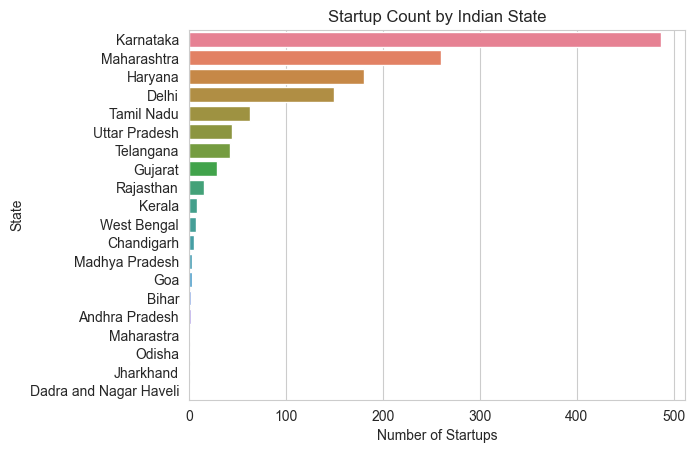

In [24]:
sns.barplot(x=stateno.values, y=stateno.index, palette='husl')
plt.xlabel('Number of Startups')
plt.ylabel('State')
plt.title('Startup Count by Indian State')
#plt.tight_layout() husl rocket
plt.show()

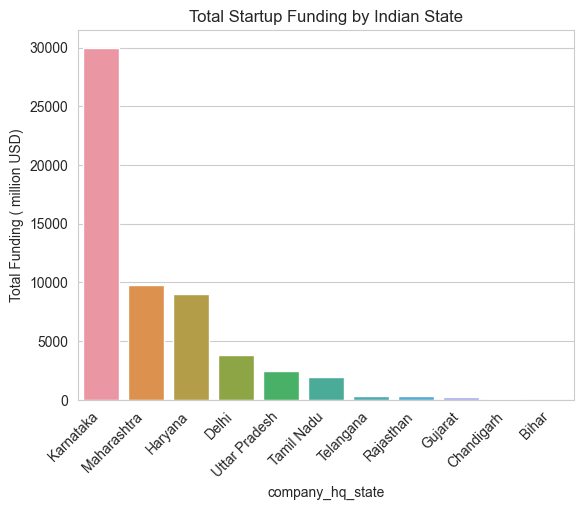

In [25]:

plt
state_funding = dfstate.groupby('company_hq_state')['amount_usd'].sum().sort_values(ascending=False)
state_funding=state_funding/10**6

sns.barplot(x=state_funding.index[:11], y=state_funding.values[:11])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Funding ( million USD)')
plt.title('Total Startup Funding by Indian State')
plt.show()

In [26]:
import geopandas as gpd

In [27]:
gdf = gpd.read_file('india-polygon.shp')
gdf.head(3)

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."


In [28]:
merged_gdf = gdf.merge(
    state_funding,
    how='left',  # key change!
    left_on='st_nm',
    right_on='company_hq_state'
)

merged_gdf

,id,st_nm,geometry,amount_usd
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",NaN
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",NaN
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.3764,...",33.00000
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",52.10000
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",NaN
6,None,Dadra and Nagar Haveli,"POLYGON ((73.2064 20.12165, 73.20865 20.10695,...",1.00000
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",NaN
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",1.90000
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...",283.58000


In [29]:
#it also has stses that are unfunded, so we relace them wit 0 so that they are dispaled as well

# Replace NaN with 0 for unfunded states
#merged_gdf['amount_usd'] = merged_gdf['amount_usd'].fillna(0)


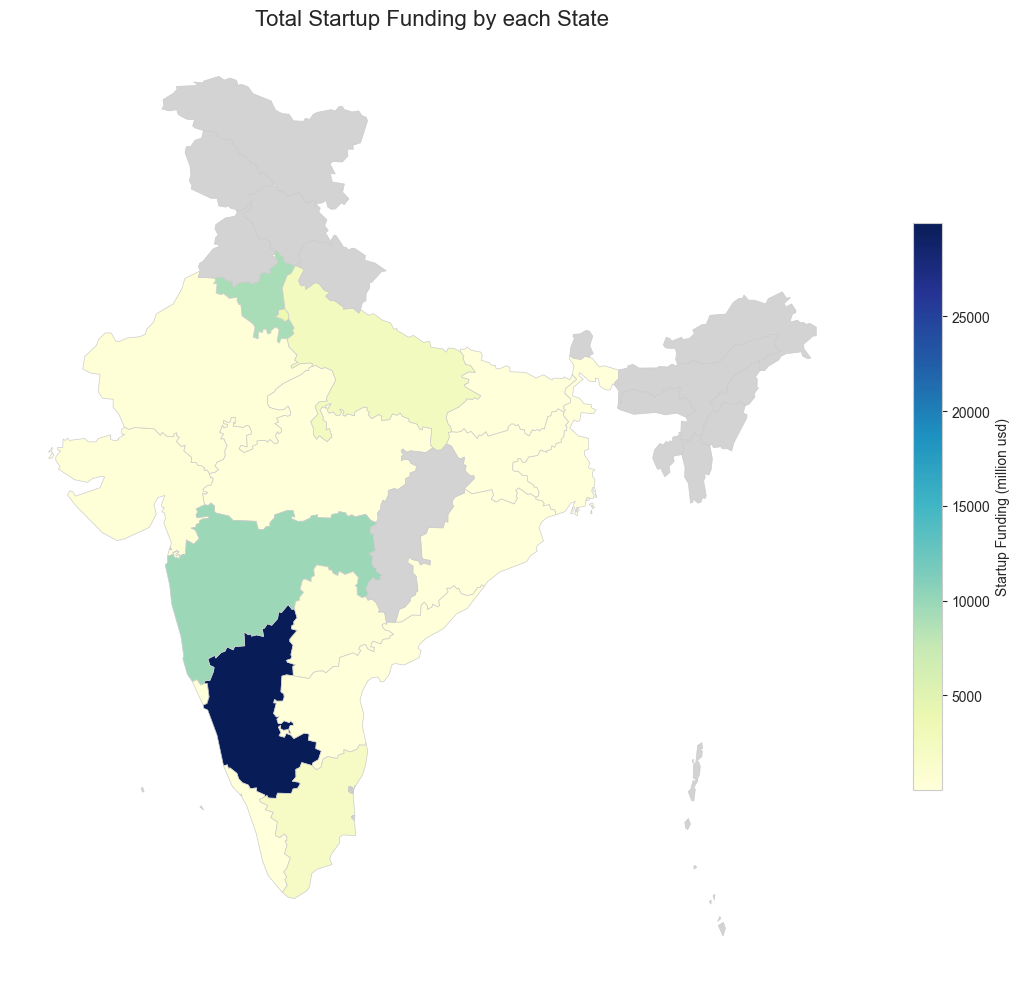

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged_gdf.plot(
    column='amount_usd',
    cmap='YlGnBu',
    linewidth=0.5,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={
        "color": "lightgray",
        "label": "No Data"
    },
    legend_kwds={
        "label": "Startup Funding (million usd)",
        "shrink": 0.6
    }
)

ax.set_title("Total Startup Funding by each State", fontsize=16)
ax.axis('off')  #
plt.tight_layout()
plt.show()


# Q2. What states are most favourable for what sector of industries?


### Sector wise distribution of funding amount across states

In [31]:
statesec=dfstate.groupby(['company_hq_state','sector'])['amount_usd'].sum().reset_index()
statesec

,company_hq_state,sector,amount_usd
0,Andhra Pradesh,Retail,6300000.0
1,Bihar,Agritech,33000000.0
2,Chandigarh,Agritech,21000000.0
3,Chandigarh,Ai,200000.0
4,Chandigarh,Automotive,28000000.0
...,...,...,...
495,West Bengal,Edtech,6000000.0
496,West Bengal,Food & Beverages,15000000.0
497,West Bengal,Healthcare,3000000.0
498,West Bengal,Metal Manufacturing,2400000.0


In [32]:
top_sector_by_state = (
    dfstate.groupby(['company_hq_state', 'sector'])['amount_usd']
    .sum()
    .reset_index()
    .sort_values('amount_usd', ascending=False)          #to get all sectors of each state arrranged by totoal amount, ab states order m nahi honey like kerela ke beech mmaharashtra aa skta, if uska amount jyada h to
    .drop_duplicates('company_hq_state')  # keep top sector per state, drop duplicates removes the first occurences of each elemnts in df, so first occurence to sbse highest hi hoga sinc ehumne data ko arrange kr rkha h , to uske baad wala sector ka wo drop krdega to hume mil jyg aotp sectos per state by amount
)
top_sector_by_state

,company_hq_state,sector,amount_usd
217,Karnataka,Financial Services,2.827560e+09
361,Maharashtra,Logistics,2.505500e+09
117,Haryana,E-Commerce,1.396800e+09
474,Uttar Pradesh,Financial Services,1.201700e+09
30,Delhi,Financial Services,1.078500e+09
415,Tamil Nadu,Financial Services,4.940000e+08
397,Rajasthan,Financial Services,2.378000e+08
460,Telangana,Solar,1.250000e+08
95,Gujarat,Software,1.250000e+08
1,Bihar,Agritech,3.300000e+07


In [33]:
#merging with hsp file for plotting
merged = gdf.merge(top_sector_by_state, left_on='st_nm', right_on='company_hq_state', how='left')
merged.head(3)

,id,st_nm,geometry,company_hq_state,sector,amount_usd
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",NaN,NaN,NaN
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",NaN,NaN,NaN


In [34]:
merged['coords'] = merged['geometry'].representative_point()
merged.head(3)

,id,st_nm,geometry,company_hq_state,sector,amount_usd,coords
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,POINT (92.83584 12.60209)
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",NaN,NaN,NaN,POINT (95.0458 28.05197)
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",NaN,NaN,NaN,POINT (90.79609 26.05284)


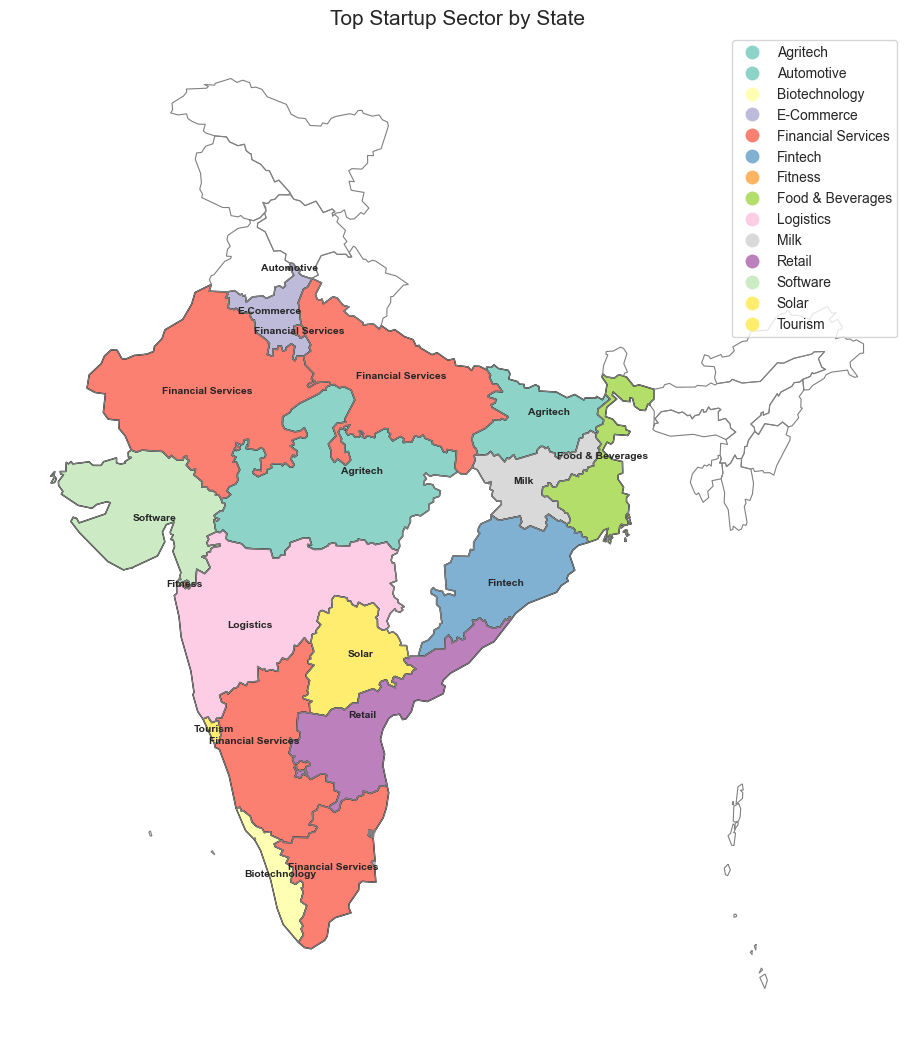

In [35]:
fig, ax = plt.subplots(figsize=(13, 13))
gdf.boundary.plot(ax=ax, color='gray', linewidth=0.8)
merged.plot(ax=ax, column='sector', cmap='Set3', legend=True, edgecolor='black')
for idx, row in merged.iterrows():
    if pd.notnull(row['sector']):
        ax.text(row['coords'].x, row['coords'].y, row['sector'],
                fontsize=7.5, ha='center', va='center', fontweight='bold')
plt.title("Top Startup Sector by State", fontsize=15)
plt.axis('off')
plt.show()

## Inferences
<b> we candraw folliwnng of some informationfrom the above analyses <b> <endl>
<li> Karnataka and Maharashtra alone account for over 50% of total startup funding — indicating a massive concentration of investor interest in these two states.
 <li> Software and Fintech dominate the funding charts in urban tech hubs like Bengaluru and Gurgaon, while traditional sectors like Retail and Food & Beverage dominate in smaller states like Madhya Prades annd Bihar.
     <li> So, it would be beneficial for me to be in these locations as their seems to be a greater visibility of these sectors from HQ-ed at these locations.

# Q3. Suppose you are trying to determine the right time to seek funding in your respective sector. What are the best months that typically receive the highest funding?

In [36]:
dfstate.head(5)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year,company_hq_state
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021,Haryana
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Unknown,12,2021,Maharashtra
2,Simpl,2015.0,Bengaluru,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,12,2021,Karnataka
3,PayGlocal,2021.0,Bengaluru,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,12,2021,Karnataka
4,Curefit,2016.0,Bengaluru,"Health, Wellness & Fitness",Tata Digital-backed Curefit,"Mukesh Bansal, Ankit",Zomato,145000000.0,Unknown,12,2021,Karnataka


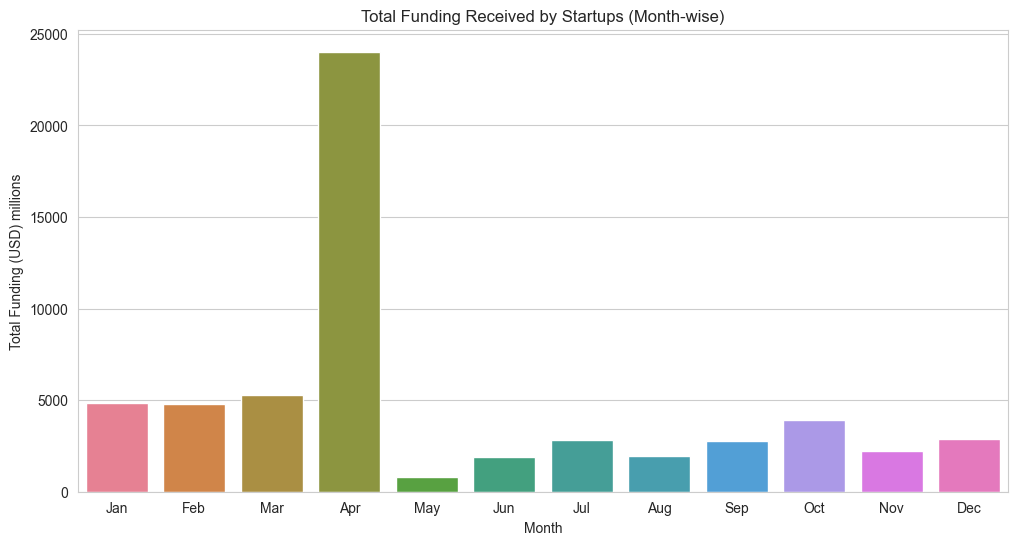

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Group and sort months correctly
monthly_funding = dfstate.groupby('funding_month')['amount_usd'].sum()
monthly_funding=monthly_funding/10**6
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_funding.index, y=monthly_funding.values, palette='husl')

plt.title('Total Funding Received by Startups (Month-wise)')
plt.ylabel('Total Funding (USD) millions')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=calendar.month_abbr[1:])

plt.show()


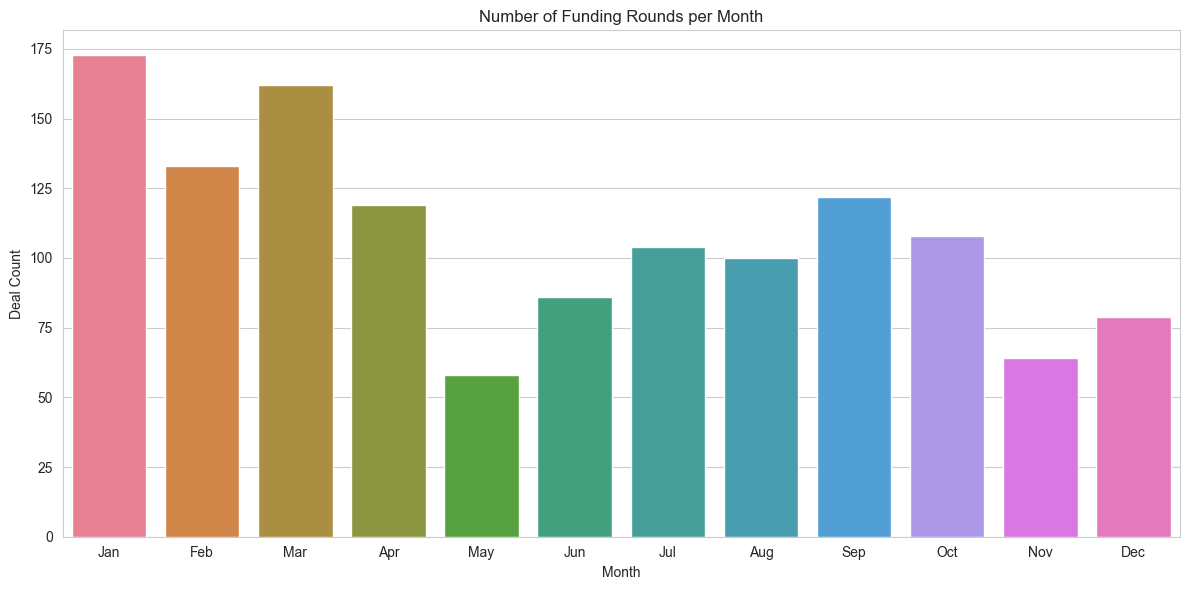

In [38]:
#2. Number of Funding Deals per Month
funding_count = dfstate['funding_month'].value_counts()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=funding_count.index, y=funding_count.values, palette='husl')

plt.title('Number of Funding Rounds per Month')
plt.xlabel('Month')
plt.ylabel('Deal Count')
plt.xticks(ticks=range(12), labels=calendar.month_abbr[1:])
plt.tight_layout()
plt.show()

In [39]:
dfstate['funding_month'].value_counts().sort_index()

1     173
2     133
3     162
4     119
5      58
6      86
7     104
8     100
9     122
10    108
11     64
12     79
Name: funding_month, dtype: int64

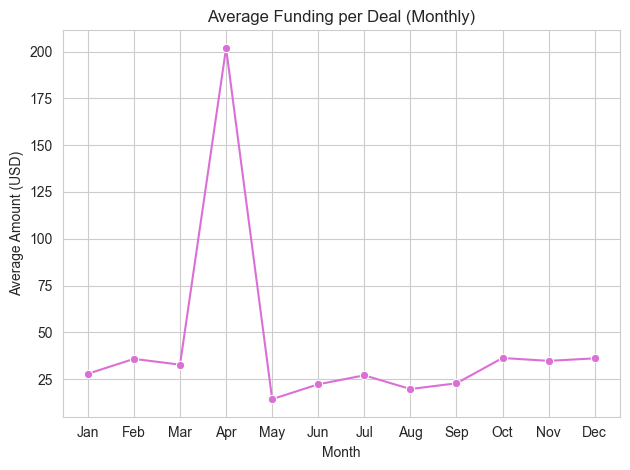

In [40]:
#3. Average Funding per Deal (by Month)
avgfunding = dfstate.groupby('funding_month')['amount_usd'].mean()
avgfunding=avgfunding/10**6
sns.lineplot(x=avgfunding.index, y=avgfunding.values, marker='o', color='orchid')
plt.title('Average Funding per Deal (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Amount (USD)')
plt.xticks(ticks=range(1,13), labels=calendar.month_abbr[1:])
plt.tight_layout()
plt.show()

In [41]:
 #Time Series: top sector Funding from Jan 2020 to Dec 2024

In [42]:
dfstate['month_year'] = pd.to_datetime(dfstate['funding_year'].astype(str) + '-' + dfstate['funding_month'].astype(str) + '-01')
dfstate.head(3)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year,company_hq_state,month_year
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021,Haryana,2021-12-01
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Unknown,12,2021,Maharashtra,2021-12-01
2,Simpl,2015.0,Bengaluru,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,12,2021,Karnataka,2021-12-01


In [43]:
top_sectors = dfstate['sector'].value_counts().head(5).index
df_top_sectors = dfstate[dfstate['sector'].isin(top_sectors)]

#groupping
monthly_sector_funding = (
    df_top_sectors.groupby(['month_year', 'sector'])['amount_usd']
    .sum()
    .reset_index()
)
monthly_sector_funding['amount_usd_millions'] = monthly_sector_funding['amount_usd'] / 10**6


In [44]:
monthly_sector_funding

,month_year,sector,amount_usd,amount_usd_millions
0,2021-01-01,Edtech,6.820000e+07,68.20
1,2021-01-01,Fintech,1.385000e+08,138.50
2,2021-01-01,Information Technology & Services,7.000000e+06,7.00
3,2021-02-01,Edtech,6.506000e+07,65.06
4,2021-02-01,Fintech,2.371000e+08,237.10
5,2021-03-01,Edtech,4.807000e+08,480.70
6,2021-03-01,Fintech,5.320000e+08,532.00
7,2021-04-01,Edtech,2.045000e+08,204.50
8,2021-04-01,Fintech,6.645000e+08,664.50
9,2021-04-01,Information Technology & Services,1.000000e+05,0.10


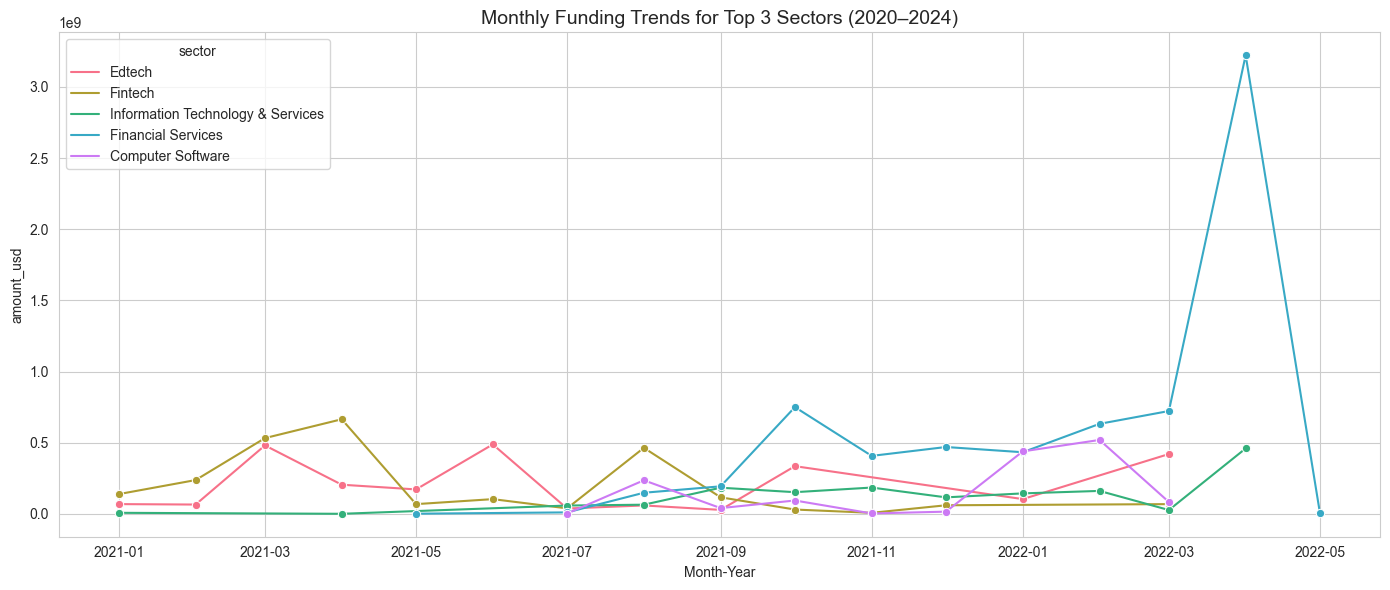

In [45]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_sector_funding,
    x='month_year', y='amount_usd',
    hue='sector', palette='husl', marker='o'
)

plt.title('Monthly Funding Trends for Top 3 Sectors (2020–2024)', fontsize=14)
plt.xlabel('Month-Year')
#plt.ylabel('Funding (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


## inferences
<li>April shows an unusually high total funding spike (~24,000M USD), but…
<b>The number of funding rounds in April is not the highest — it’s lower than Jan, Feb, and Mar. so we can say that the each deal inapril is of not a big amount
    </b>
 <li>Good time to approach investors for initial or smaller rounds  is Jan, Feb ,March, APril due to high volume of fundings that happen.
     <li>Most sectors show flatter, consistent funding, rarely exceeding $500M/month.,excep to of Finacial servces which has boomed lately.

# Q4. Suppose your goal is to invest in small startup companies. What kind of sectors receive multiple rounds of funding? More funding leads to better exits and increased profits

In [51]:
#get all sectors
print ("Total number of distinct sectors - {}\n".format(len(pd.unique(df['sector']))))

Total number of distinct sectors - 249



In [54]:
common_sector_list = df['sector'].value_counts().head(20).index.tolist()
common_sector_list

['Financial Services',
 'Fintech',
 'Edtech',
 'Information Technology & Services',
 'Healthcare',
 'Food & Beverages',
 'Computer Software',
 'E-Commerce',
 'E-Learning',
 'Automotive',
 'Health, Wellness & Fitness',
 'Consumer Goods',
 'Logistics & Supply Chain',
 'Agritech',
 'Retail',
 'Software',
 'Saas',
 'Gaming',
 'Healthtech',
 'Hospital & Health Care']

In [55]:
df4= df[df['sector'].isin(common_sector_list)]
df4.head(3)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Unknown,12,2021
4,PayGlocal,2021.0,Bengaluru,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,12,2021


In [56]:
df4 = df4.dropna(subset=['amount_usd'])

In [58]:
df4 = df4[~df4['amount_usd'].str.isalnum()]

In [59]:
#Counting rounds per startup
company_rounds = df.groupby(['company_name', 'sector'])['funding_round'].count().reset_index(name='round_count')


In [60]:
# Filtering those with more than 1 round
multi_round_companies = company_rounds[company_rounds['round_count'] > 1]

In [62]:
#Counting  such startups per sector

sector_multi_rounds = multi_round_companies['sector'].value_counts().reset_index()
sector_multi_rounds.columns = ['sector', 'multi_round_startup_count']

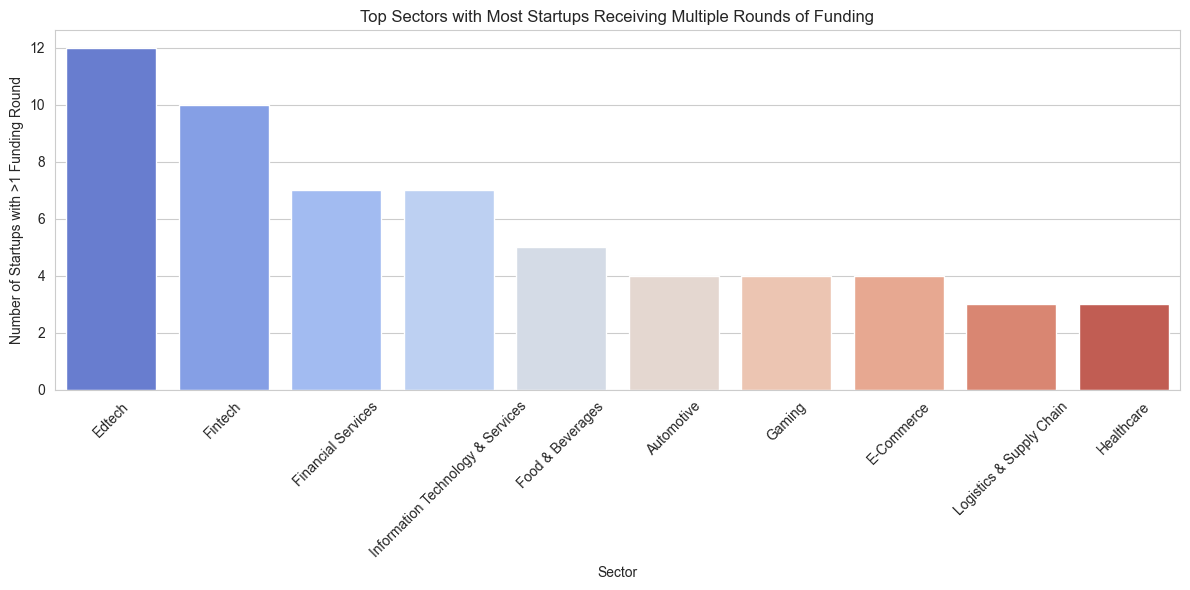

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=sector_multi_rounds.head(10), 
    x='sector', 
    y='multi_round_startup_count', 
    palette='coolwarm'
)
plt.title('Top Sectors with Most Startups Receiving Multiple Rounds of Funding')
plt.xlabel('Sector')
plt.ylabel('Number of Startups with >1 Funding Round')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

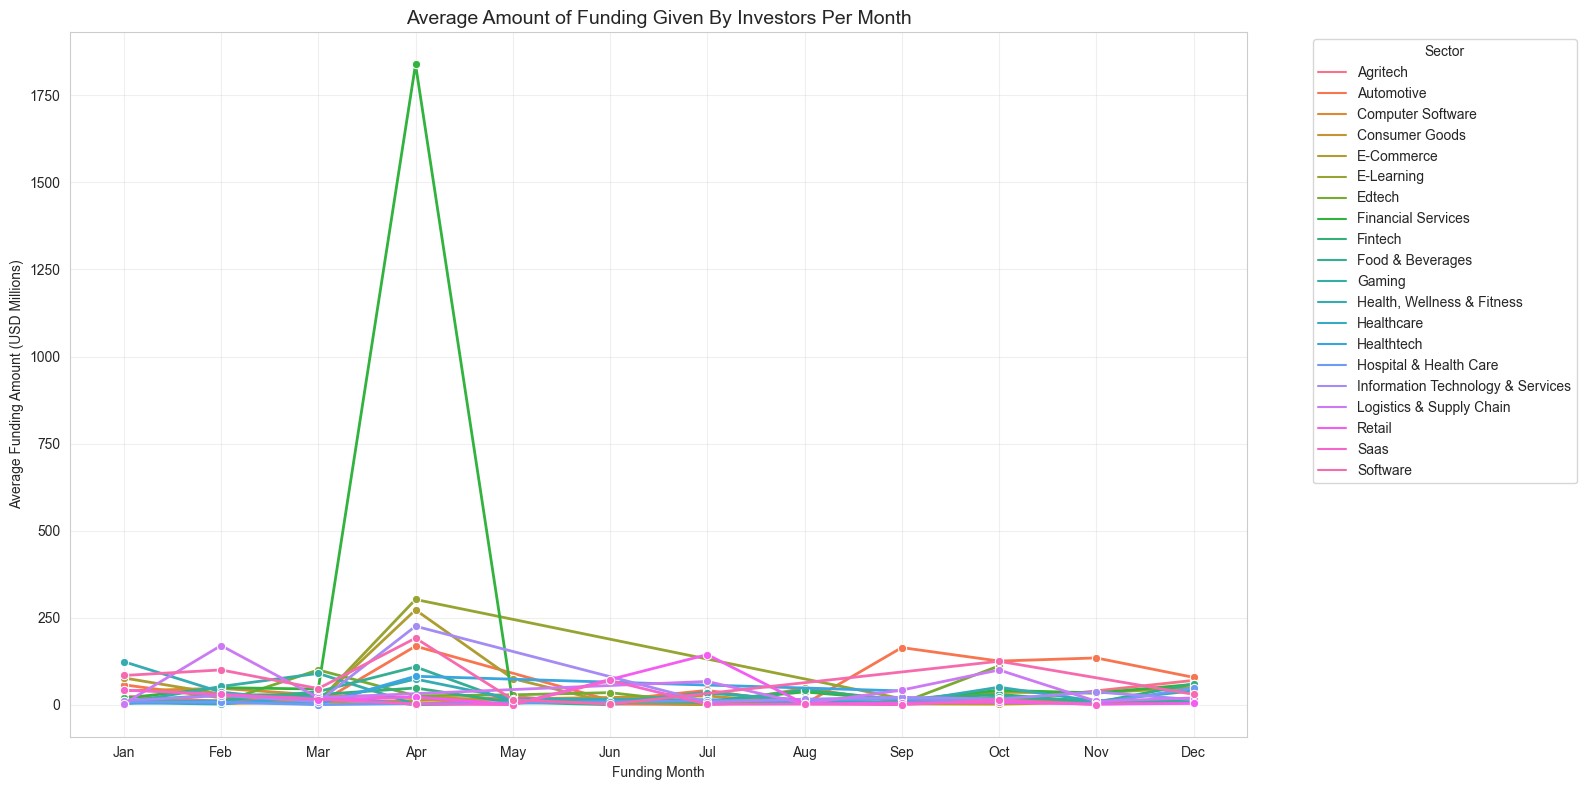

In [71]:
# STEP 1: Group the data by sector and funding month to compute average amount
monthly_avg_funding = df4.groupby(['sector', 'funding_month'])['amount_usd'].mean().reset_index()

# STEP 2: Optional - Convert funding amount to millions for readability
monthly_avg_funding['amount_usd_millions'] = monthly_avg_funding['amount_usd'] / 1e6

# STEP 3: Plot using seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=monthly_avg_funding, 
    x='funding_month', 
    y='amount_usd_millions', 
    hue='sector', 
    marker='o',
    linewidth=2
)

plt.title('Average Amount of Funding Given By Investors Per Month', fontsize=14)
plt.xlabel('Funding Month')
plt.ylabel('Average Funding Amount (USD Millions)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



For the Automotive sector, the best months to seek funding are April and September. 
<li><br>
In general, April is typically a great month for companies to acquire funding. However, different sectors perform well during different time periods of the year. In your case, It is April as well!